# Problem 2

In [1]:
library(glue)
library(dplyr)
library(readr)
library(ggthemes)
library(tidyr)
library(hrbrthemes)
library(viridis)
library(ggplot2)
library(ggpubr)
library(lubridate)
library(stringi)
library(tidyverse)
library(corrplot)

Warning message:
"pakiet 'glue' został zbudowany w wersji R 4.2.2"
Warning message:
"pakiet 'dplyr' został zbudowany w wersji R 4.2.2"

Dołączanie pakietu: 'dplyr'


Następujące obiekty zostały zakryte z 'package:stats':

    filter, lag


Następujące obiekty zostały zakryte z 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"pakiet 'readr' został zbudowany w wersji R 4.2.2"
Warning message:
"pakiet 'ggthemes' został zbudowany w wersji R 4.2.2"
Warning message:
"pakiet 'tidyr' został zbudowany w wersji R 4.2.2"
Warning message:
"pakiet 'hrbrthemes' został zbudowany w wersji R 4.2.2"
NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Warning message:
"pakiet 'viridis' został zbudowany w wersji R 4.2.2"
Ładowanie wymaganego pakietu: viridisLite

Warning mes

In [2]:
mieso <- read.csv("data/mieso.csv", header = TRUE, sep = ",")
nabial <- read.csv("data/nabial.csv", header = TRUE, sep = ",")
pieczywo <- read.csv("data/pieczywo.csv", header = TRUE, sep = ",")
slodycze <- read.csv("data/slodycze.csv", header = TRUE, sep = ",")
tluszcze <- read.csv("data/tluszcze.csv", header = TRUE, sep = ",")
warzywa <- read.csv("data/warzywa.csv", header = TRUE, sep = ",")

In [3]:
# glue(head(mieso_tidy$cena, n= 100), head(nabial_tidy$cena, n= 100))

In [4]:
rows = 100

#create data frame with 0 rows and 3 columns
df_cor <- data.frame(matrix(ncol = 6, nrow = rows))

#provide column names
colnames(df_cor) <- c('mieso', 'nabial', 'pieczywo', 'slodycze', 'tluszcze', 'warzywa')

In [5]:
# tidy
mieso_tidy <- mieso |> pivot_longer(-Period, names_to = "kraj", values_to = "cena")
nabial_tidy <- nabial |> pivot_longer(-Period, names_to = "kraj", values_to = "cena")
pieczywo_tidy <- pieczywo |> pivot_longer(-Period, names_to = "kraj", values_to = "cena")
slodycze_tidy <- slodycze |> pivot_longer(-Period, names_to = "kraj", values_to = "cena")
tluszcze_tidy <- tluszcze |> pivot_longer(-Period, names_to = "kraj", values_to = "cena")
warzywa_tidy <- warzywa |> pivot_longer(-Period, names_to = "kraj", values_to = "cena")

In [6]:
df_cor['mieso'] = head(mieso_tidy$cena, n = rows)
df_cor['nabial'] = head(nabial_tidy$cena, n = rows)
df_cor['pieczywo'] = head(pieczywo_tidy$cena, n = rows)
df_cor['slodycze'] = head(slodycze_tidy$cena, n = rows)
df_cor['tluszcze'] = head(tluszcze_tidy$cena, n = rows)
df_cor['warzywa'] = head(warzywa_tidy$cena, n = rows)

In [7]:
cor_matrix = cor(df_cor)

In [8]:
cor_matrix

,mieso,nabial,pieczywo,slodycze,tluszcze,warzywa
mieso,1.0000000,0.8304378,0.8221961,0.8111672,0.8170653,0.7060012
nabial,0.8304378,1.0000000,0.8893400,0.8145723,0.8433124,0.7598769
pieczywo,0.8221961,0.8893400,1.0000000,0.8751538,0.7328427,0.8354569
slodycze,0.8111672,0.8145723,0.8751538,1.0000000,0.7658236,0.8070602
tluszcze,0.8170653,0.8433124,0.7328427,0.7658236,1.0000000,0.6049740
warzywa,0.7060012,0.7598769,0.8354569,0.8070602,0.6049740,1.0000000


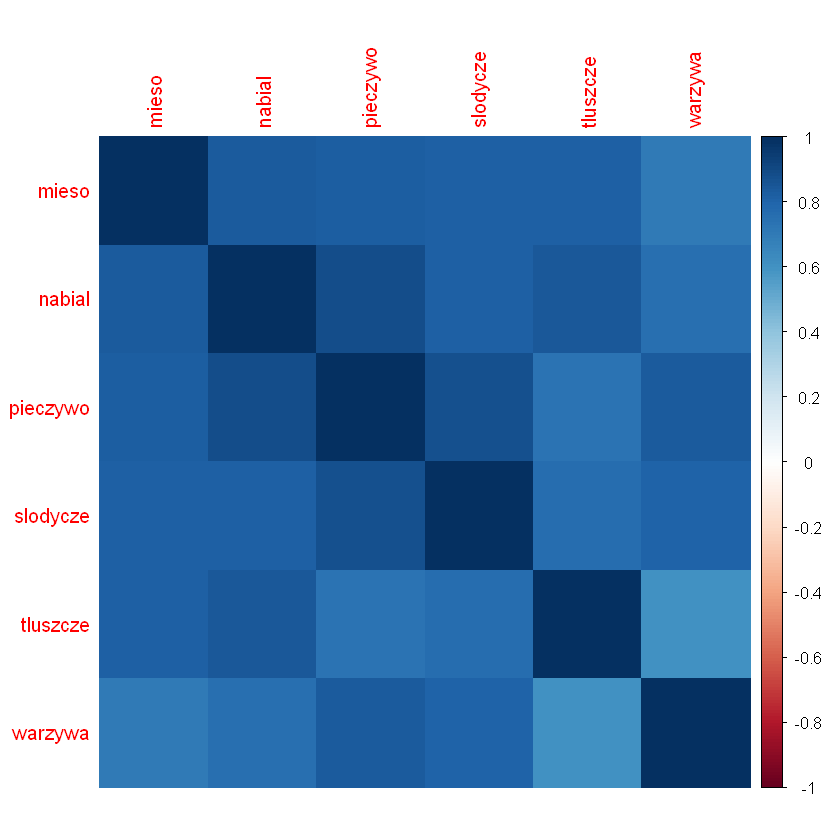

In [9]:
corrplot(cor_matrix, method="color")

In [10]:
# type column
mieso_tidy["typ"] = "mieso"
nabial_tidy["typ"] = "nabial"
pieczywo_tidy["typ"] = "pieczywo"
slodycze_tidy["typ"] = "slodycze"
tluszcze_tidy["typ"] = "tluszcze"
warzywa_tidy["typ"] = "warzywa"

In [11]:
# Concatenate the dataframes
zywnosc_tidy <- rbind(mieso_tidy, nabial_tidy, pieczywo_tidy, slodycze_tidy, tluszcze_tidy, warzywa_tidy)

In [12]:
zywnosc_tidy$Period <- lapply(zywnosc_tidy$Period, gsub, pattern = "Jan", replacement = "01")
zywnosc_tidy$Period <- lapply(zywnosc_tidy$Period, gsub, pattern = "Feb", replacement = "02")
zywnosc_tidy$Period <- lapply(zywnosc_tidy$Period, gsub, pattern = "Mar", replacement = "03")

zywnosc_tidy$Period <- lapply(zywnosc_tidy$Period, gsub, pattern = "Apr", replacement = "04")
zywnosc_tidy$Period <- lapply(zywnosc_tidy$Period, gsub, pattern = "May", replacement = "05")
zywnosc_tidy$Period <- lapply(zywnosc_tidy$Period, gsub, pattern = "Jun", replacement = "06")

zywnosc_tidy$Period <- lapply(zywnosc_tidy$Period, gsub, pattern = "Jul", replacement = "07")
zywnosc_tidy$Period <- lapply(zywnosc_tidy$Period, gsub, pattern = "Aug", replacement = "08")
zywnosc_tidy$Period <- lapply(zywnosc_tidy$Period, gsub, pattern = "Sep", replacement = "09")

zywnosc_tidy$Period <- lapply(zywnosc_tidy$Period, gsub, pattern = "Oct", replacement = "10")
zywnosc_tidy$Period <- lapply(zywnosc_tidy$Period, gsub, pattern = "Nov", replacement = "11")
zywnosc_tidy$Period <- lapply(zywnosc_tidy$Period, gsub, pattern = "Dec", replacement = "12")

zywnosc_tidy$Period <- sub("^", "01", zywnosc_tidy$Period )

In [13]:
# data
zywnosc_tidy$Period <- as.Date(zywnosc_tidy$Period, format = "%d%Y%m")

In [14]:
head(zywnosc_tidy)

Period,kraj,cena,typ
<date>,<chr>,<dbl>,<chr>
2022-10-01,Austria,130.72,mieso
2022-10-01,Belgium,121.85,mieso
2022-10-01,Bulgaria,152.40,mieso
2022-10-01,Cyprus,112.24,mieso
2022-10-01,Czech.Republic,143.50,mieso
2022-10-01,EU..changing.composition.,130.05,mieso


In [15]:
plot <- function(data, title, countries, types) {
    data = filter(data, typ %in% types)
    data |>
        ggplot(aes(x=Period, y=cena, group=kraj, color=kraj)) +
        scale_color_viridis(discrete = TRUE, labels = countries) +
        geom_line(size=1.5) +
        guides(fill=guide_legend(title=NULL)) +
        xlab("Data") + ylab("HICP") +
        ggtitle(title) +
        theme_ipsum() +
        scale_x_date(date_labels = "%b-%Y") +
        theme(
            legend.title = element_blank(),
            plot.title = element_text(size=18),
            axis.title.x = element_text(size=14),
            axis.title.y = element_text(size=14),
                text=element_text(family="CM Roman", size=21)
        )
}

# HICP total

In [99]:
hicp_total <- read.csv("data/HICP_food.csv", header = TRUE, sep = ",")

In [100]:
hicp_total = head(tail(hicp_total, n=nrow(hicp_total) - 1), 300)

In [101]:
hicp_total$Slovenia <- sapply(hicp_total$Slovenia, as.numeric)

In [102]:
# hicp total to tidy
hicp_total_tidy = hicp_total |> pivot_longer(-Period, names_to = "kraj", values_to = "hicp_total")

In [103]:
head(hicp_total_tidy, n= 30)

Period,kraj,hicp_total
<chr>,<chr>,<dbl>
2022Sep,Austria,124.17
2022Sep,Belgium,120.05
2022Sep,Bulgaria,150.49
2022Sep,Cyprus,114.95
2022Sep,Czech.Republic,138.00
2022Sep,EU..changing.composition.,127.79
2022Sep,Germany,133.20
2022Sep,Denmark,122.30
2022Sep,Estonia,146.83


In [104]:
hicp_total_tidy$Period <- lapply(hicp_total_tidy$Period, gsub, pattern = "Jan", replacement = "01")
hicp_total_tidy$Period <- lapply(hicp_total_tidy$Period, gsub, pattern = "Feb", replacement = "02")
hicp_total_tidy$Period <- lapply(hicp_total_tidy$Period, gsub, pattern = "Mar", replacement = "03")

hicp_total_tidy$Period <- lapply(hicp_total_tidy$Period, gsub, pattern = "Apr", replacement = "04")
hicp_total_tidy$Period <- lapply(hicp_total_tidy$Period, gsub, pattern = "May", replacement = "05")
hicp_total_tidy$Period <- lapply(hicp_total_tidy$Period, gsub, pattern = "Jun", replacement = "06")

hicp_total_tidy$Period <- lapply(hicp_total_tidy$Period, gsub, pattern = "Jul", replacement = "07")
hicp_total_tidy$Period <- lapply(hicp_total_tidy$Period, gsub, pattern = "Aug", replacement = "08")
hicp_total_tidy$Period <- lapply(hicp_total_tidy$Period, gsub, pattern = "Sep", replacement = "09")

hicp_total_tidy$Period <- lapply(hicp_total_tidy$Period, gsub, pattern = "Oct", replacement = "10")
hicp_total_tidy$Period <- lapply(hicp_total_tidy$Period, gsub, pattern = "Nov", replacement = "11")
hicp_total_tidy$Period <- lapply(hicp_total_tidy$Period, gsub, pattern = "Dec", replacement = "12")

hicp_total_tidy$Period <- sub("^", "01", hicp_total_tidy$Period )

In [105]:
hicp_total_tidy$Period <- as.Date(hicp_total_tidy$Period, format = "%d%Y%m")

In [106]:
hicp_total_tidy$kraj <- sub("^", "HICP_", hicp_total_tidy$kraj )

In [107]:
head(hicp_total_tidy)

Period,kraj,hicp_total
<date>,<chr>,<dbl>
2022-09-01,HICP_Austria,124.17
2022-09-01,HICP_Belgium,120.05
2022-09-01,HICP_Bulgaria,150.49
2022-09-01,HICP_Cyprus,114.95
2022-09-01,HICP_Czech.Republic,138.00
2022-09-01,HICP_EU..changing.composition.,127.79


In [108]:
countries = c('France', 'Hungary', 'Poland', 'Romania')

In [109]:
countries_hicp_total = paste("HICP_", countries, sep="")
countries_hicp_total

[1] "HICP_France"  "HICP_Hungary" "HICP_Poland"  "HICP_Romania"

In [110]:
hicp_total_tidy = filter(hicp_total_tidy, kraj %in% countries_hicp_total)

In [126]:
plot_with_hicp_total <- function(data, title, countries, types, inflation_data, countries_hicp_total) {
    data = filter(data, typ %in% types)
    
    ggplot() +
    geom_line(data = inflation_data, aes(x=Period, y=hicp_total, group=kraj, color=kraj)) + 
    geom_line(data = data, aes(x=Period, y=cena, group=kraj, color=kraj)) +
    scale_color_viridis(discrete = TRUE) +
    geom_line(size=1.5) +
    guides(fill=guide_legend(title=NULL)) +
    xlab("Data") + ylab("HICP") +
    ggtitle(title) +
    theme_ipsum() +
    scale_x_date(date_labels = "%b-%Y") +
    theme(
        legend.title = element_blank(),
        plot.title = element_text(size=18),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
            text=element_text(family="CM Roman", size=21)
    )
    
}

In [112]:
plot_for_country <- function(data, title, countries, types) {
    data = filter(data, typ %in% types)
    data |>
        ggplot(aes(x=Period, y=cena, group=typ, color=typ)) +
        scale_color_viridis(discrete = TRUE, labels = types) +
        geom_line(size=1.5) +
        guides(fill=guide_legend(title=NULL)) +
        xlab("Data") + ylab("HICP") +
        ggtitle(title) +
        theme_ipsum() +
        scale_x_date(date_labels = "%b-%Y") +
        theme(
            legend.title = element_blank(),
            plot.title = element_text(size=18),
            axis.title.x = element_text(size=14),
            axis.title.y = element_text(size=14),
                text=element_text(family="CM Roman", size=21)
        )
}

In [113]:
options(repr.plot.width=12, repr.plot.height=10)
options(warn=-1)

In [114]:
picks_tidy = filter(zywnosc_tidy, kraj %in% countries)

In [115]:
# Creating ranges of intervals
before_pandemic <- as.Date("01/01/2018", "%d/%m/%Y")
pandemic <- as.Date("01/03/2020", "%d/%m/%Y")
before_war <- as.Date("01/02/2021", "%d/%m/%Y")
war <- as.Date("01/02/2022", "%d/%m/%Y")
now <- as.Date("01/09/2022", "%d/%m/%Y")

In [116]:
before_pandemic_data <- picks_tidy %>% filter(Period >= before_pandemic & Period < pandemic)
pandemic_data <- picks_tidy %>% filter(Period >= pandemic & Period < before_war)
before_war_data <- picks_tidy %>% filter(Period >= before_war & Period < war)
war_data <- picks_tidy %>% filter(Period >= war & Period <= now)

In [ ]:
before_pandemic_hicp <- picks_tidy %>% filter(Period >= before_pandemic & Period < pandemic)
pandemic_data_hicp <- picks_tidy %>% filter(Period >= pandemic & Period < before_war)
before_war_data_hicp <- picks_tidy %>% filter(Period >= before_war & Period < war)
war_data_hicp <- picks_tidy %>% filter(Period >= war & Period <= now)

# Poland vs other countries

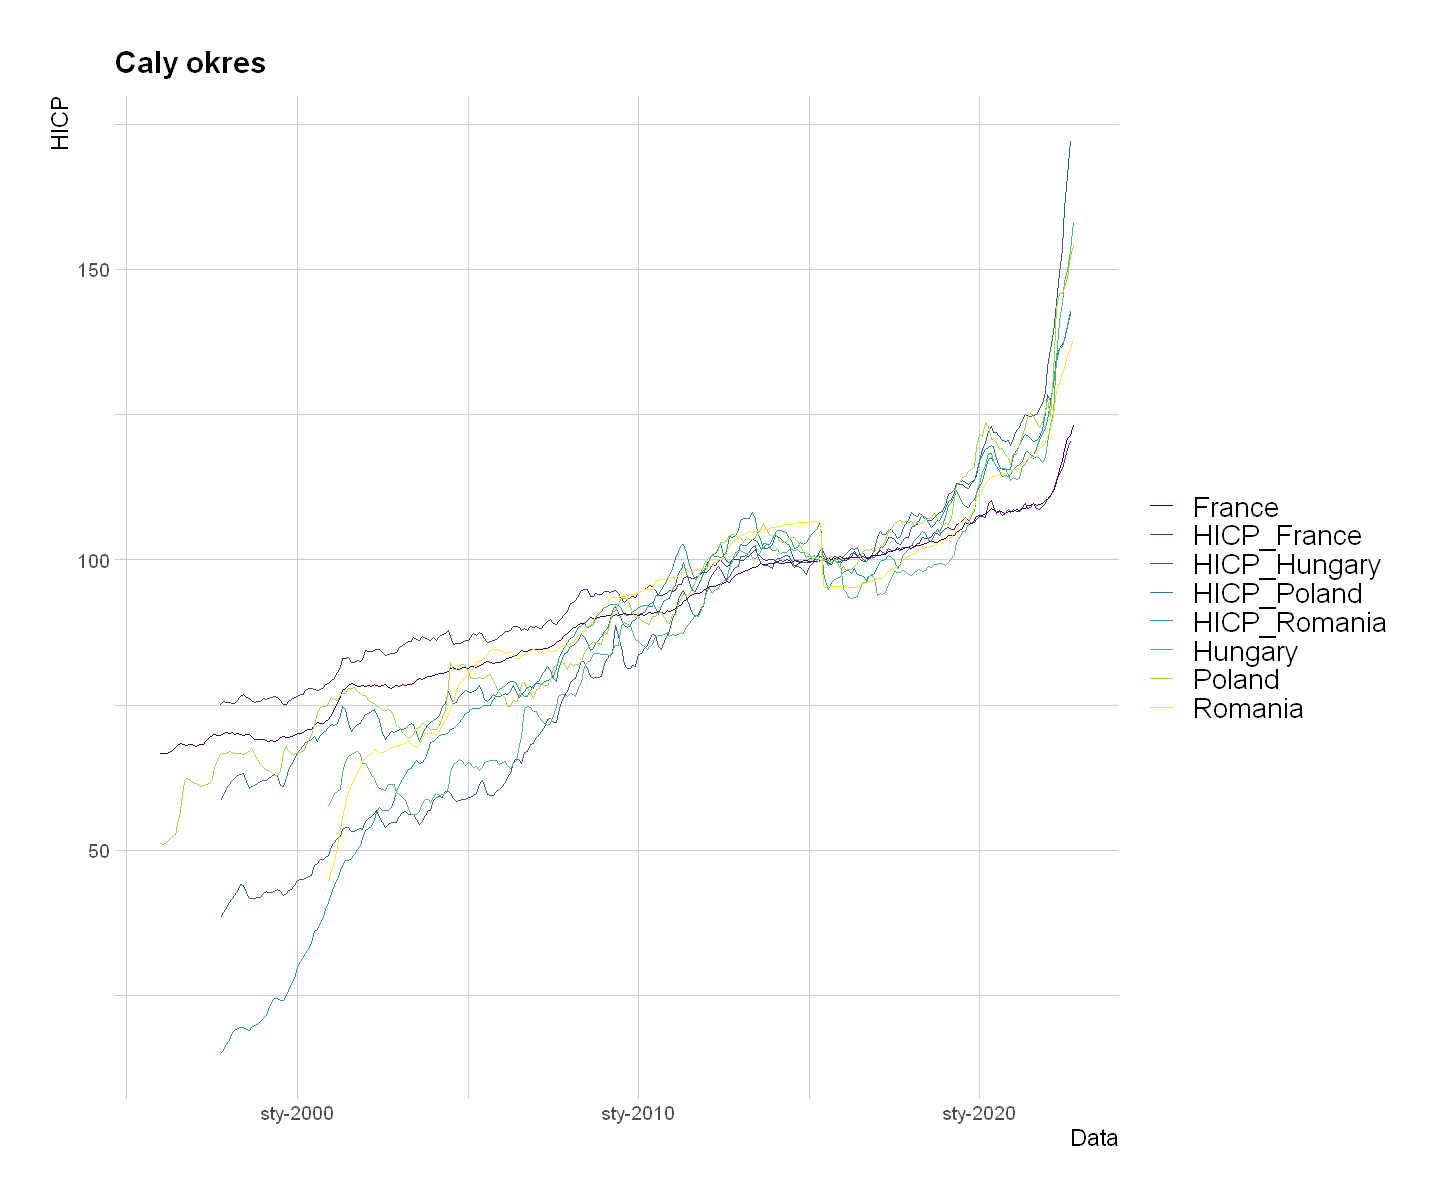

In [127]:
plot_with_hicp_total(picks_tidy, "Caly okres", countries, c('mieso'), hicp_total_tidy, countries_hicp_total)

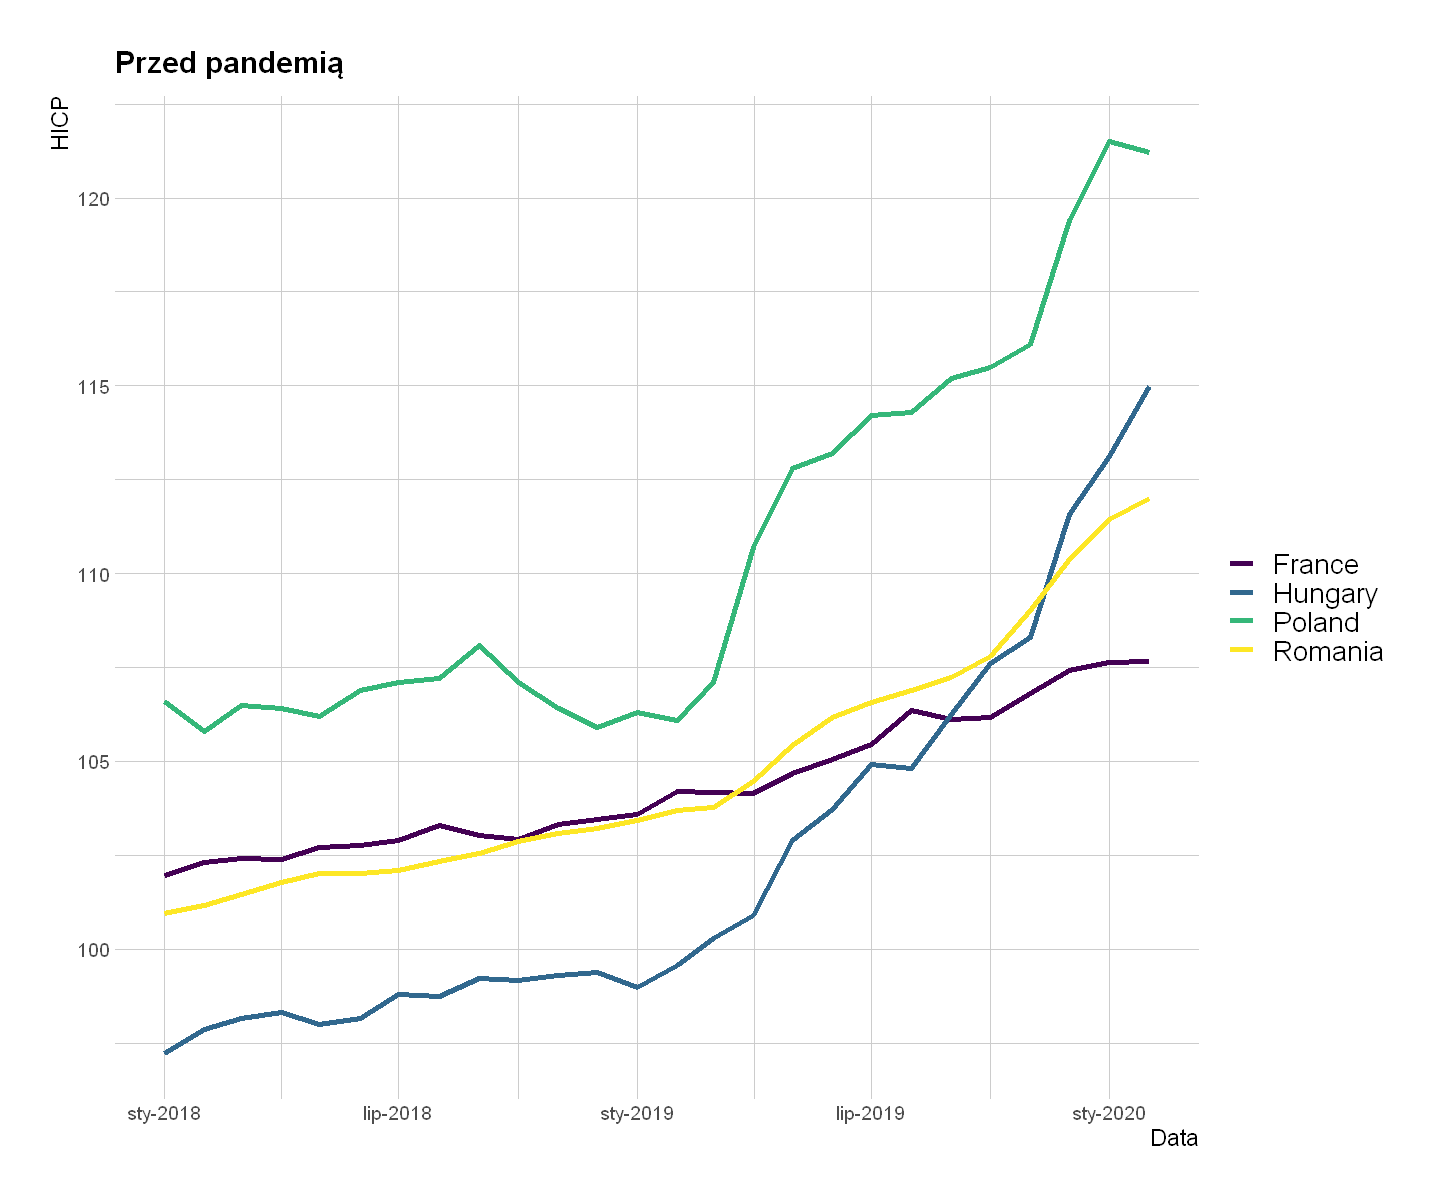

In [129]:
plot(before_pandemic_data, "Przed pandemią", countries, c('mieso'))

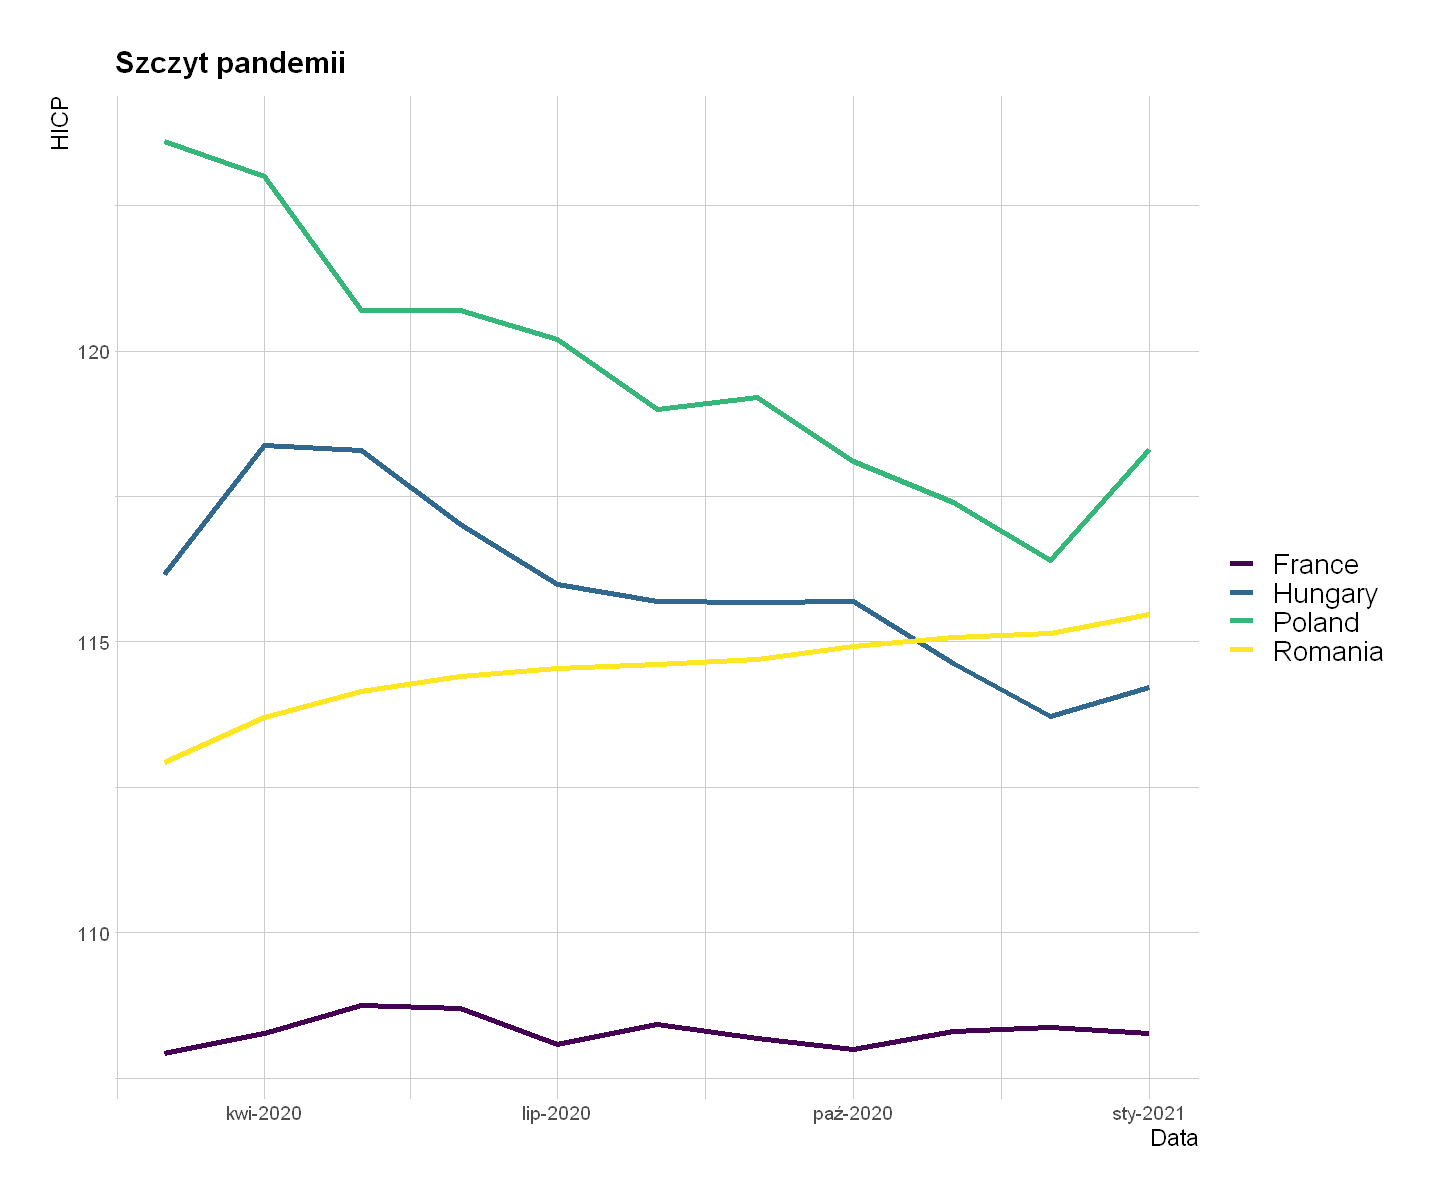

In [35]:
plot(pandemic_data, "Szczyt pandemii", countries, c('mieso'))

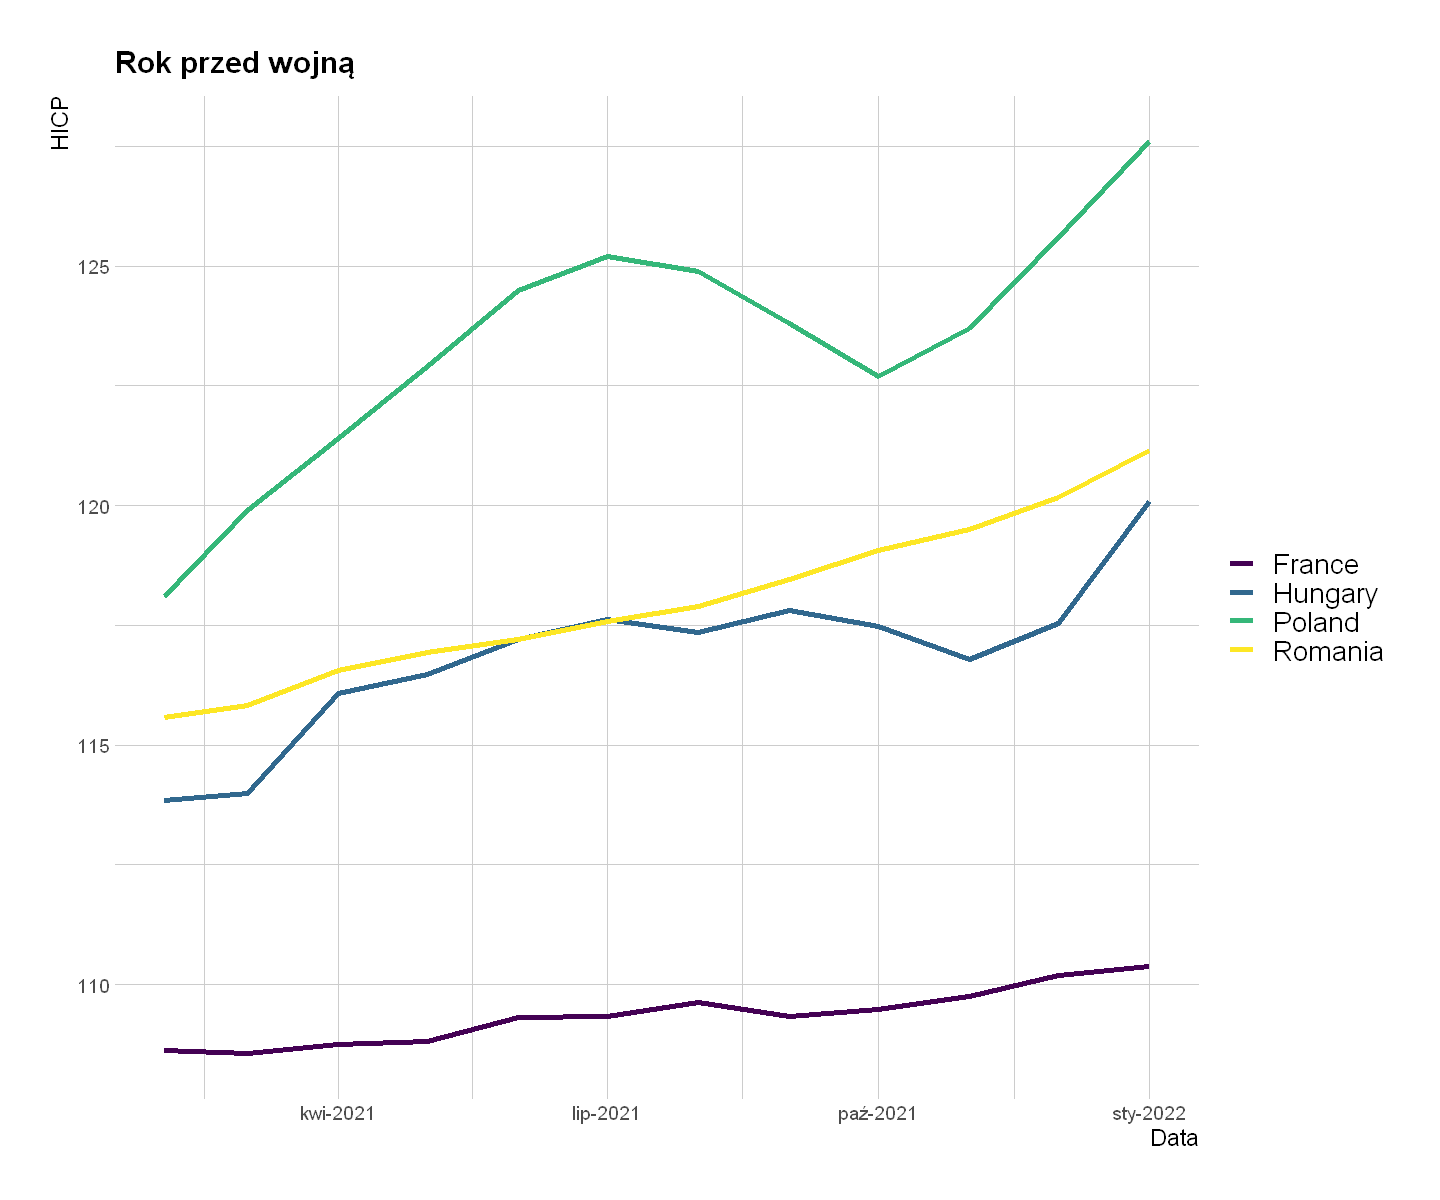

In [36]:
plot(before_war_data, "Rok przed wojną", countries, c('mieso'))

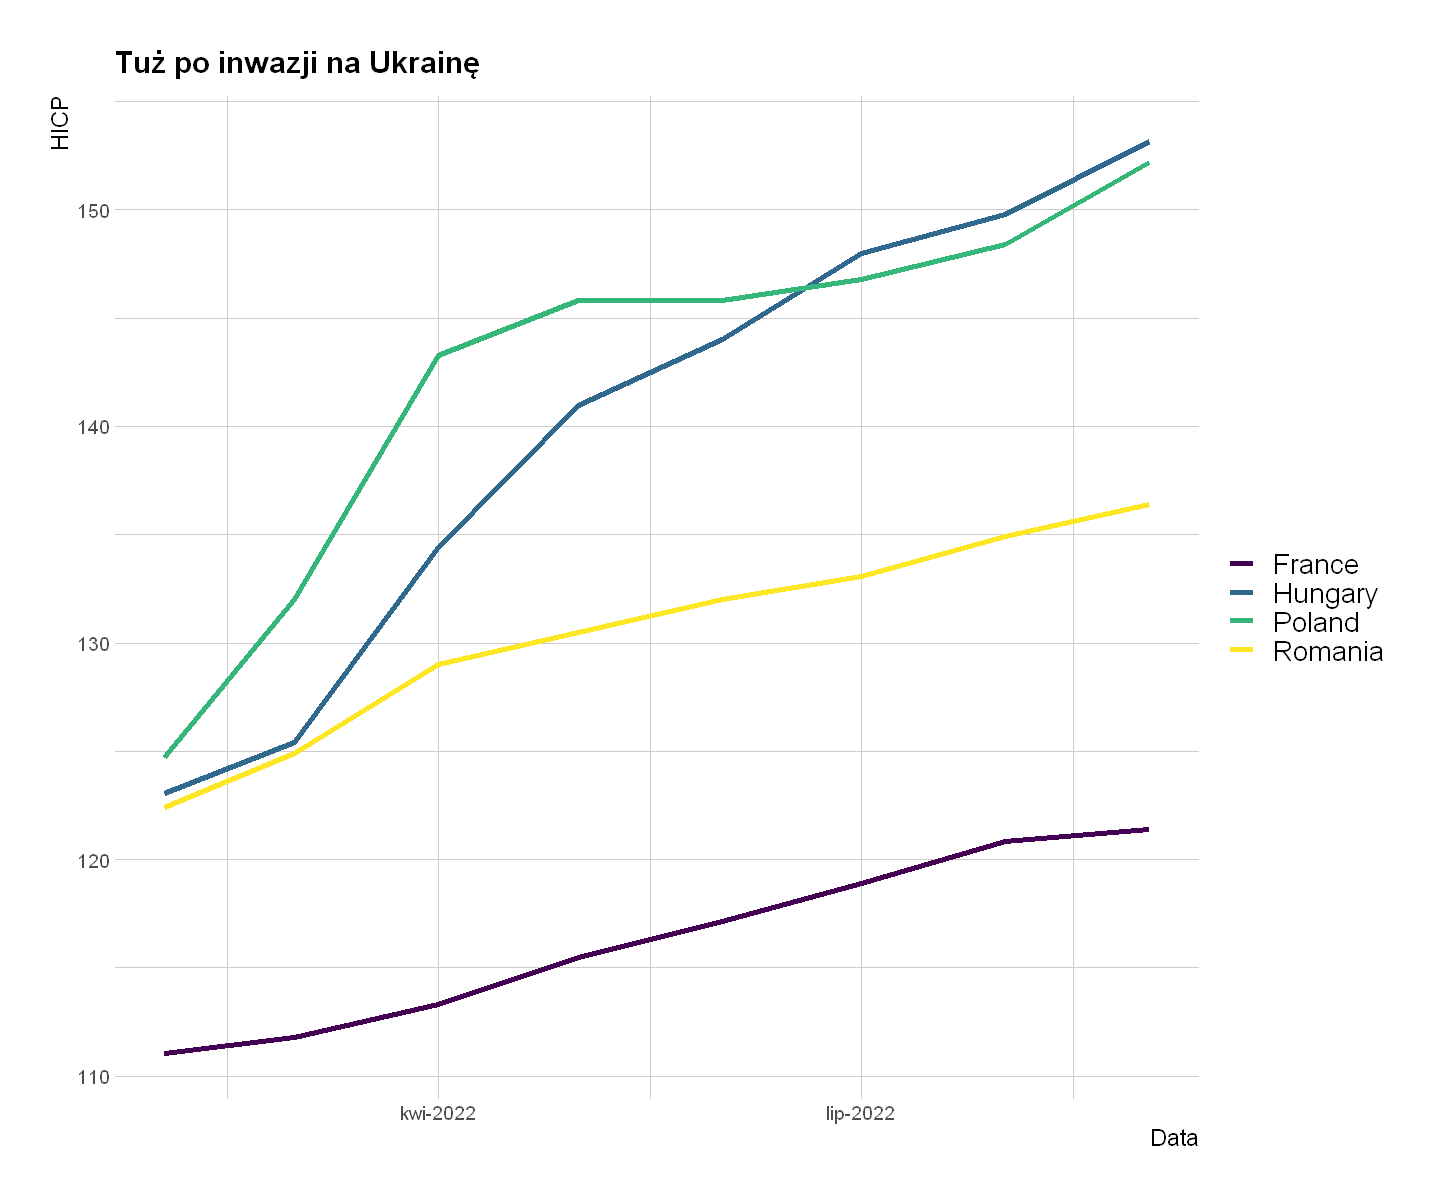

In [37]:
plot(war_data, "Tuż po inwazji na Ukrainę", countries, c('mieso'))

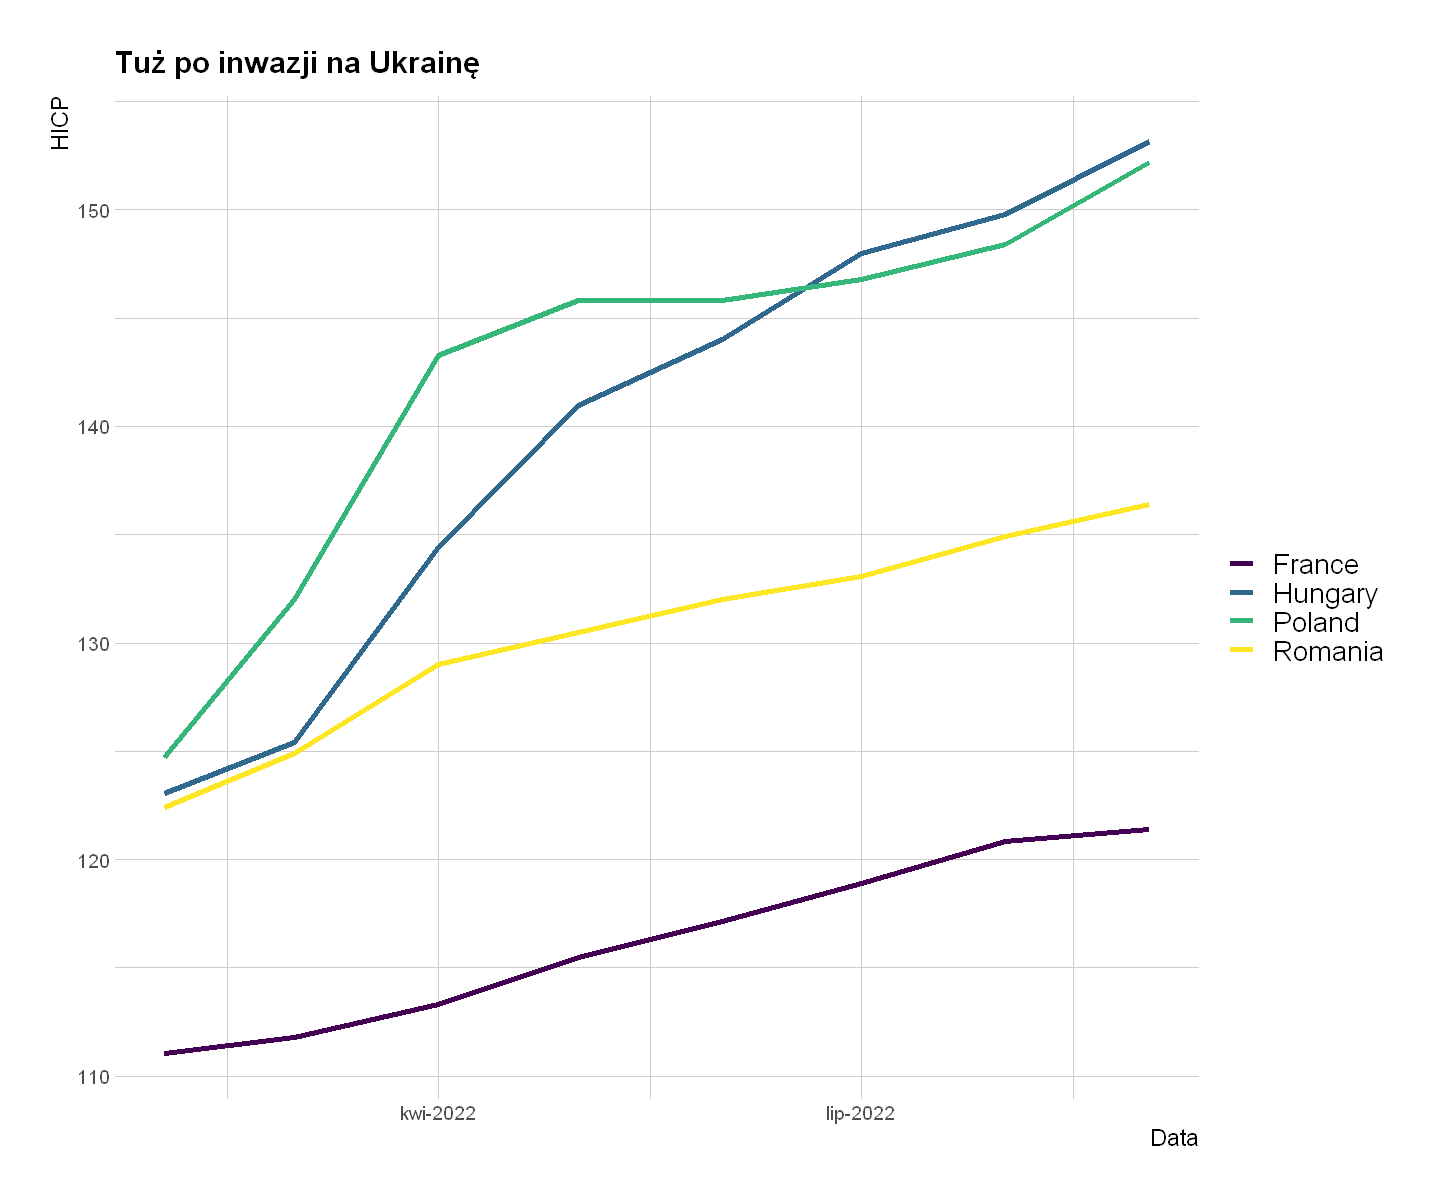

In [38]:
plot(war_data, "Tuż po inwazji na Ukrainę", countries, c('mieso'))

# Plots for Poland only

In [39]:
country = c('Poland')
country_hicp_tidy = filter(hicp_total_tidy, kraj %in% country)

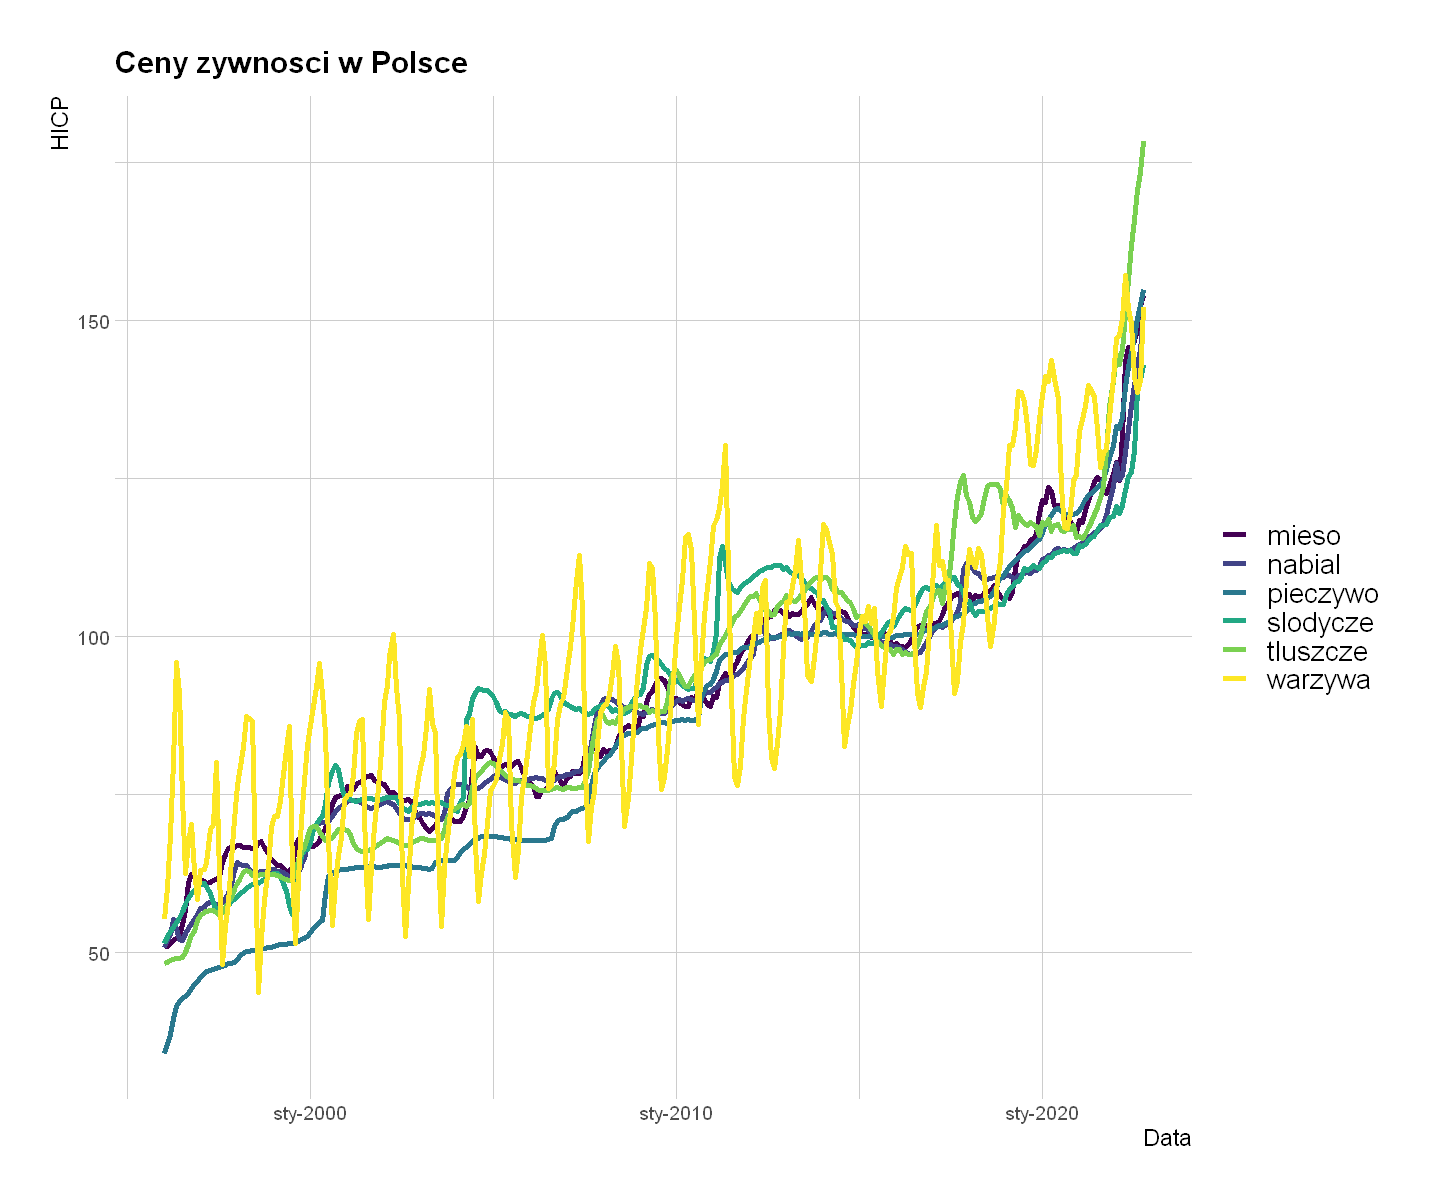

In [40]:
# ('mieso', 'nabial', 'pieczywo', 'slodycze', 'tluszcze', 'warzywa')
data_for_country = filter(picks_tidy, kraj %in% country)
plot_for_country(data_for_country, "Ceny zywnosci w Polsce", country, c('mieso', 'nabial', 'pieczywo', 'slodycze', 'tluszcze', 'warzywa'))

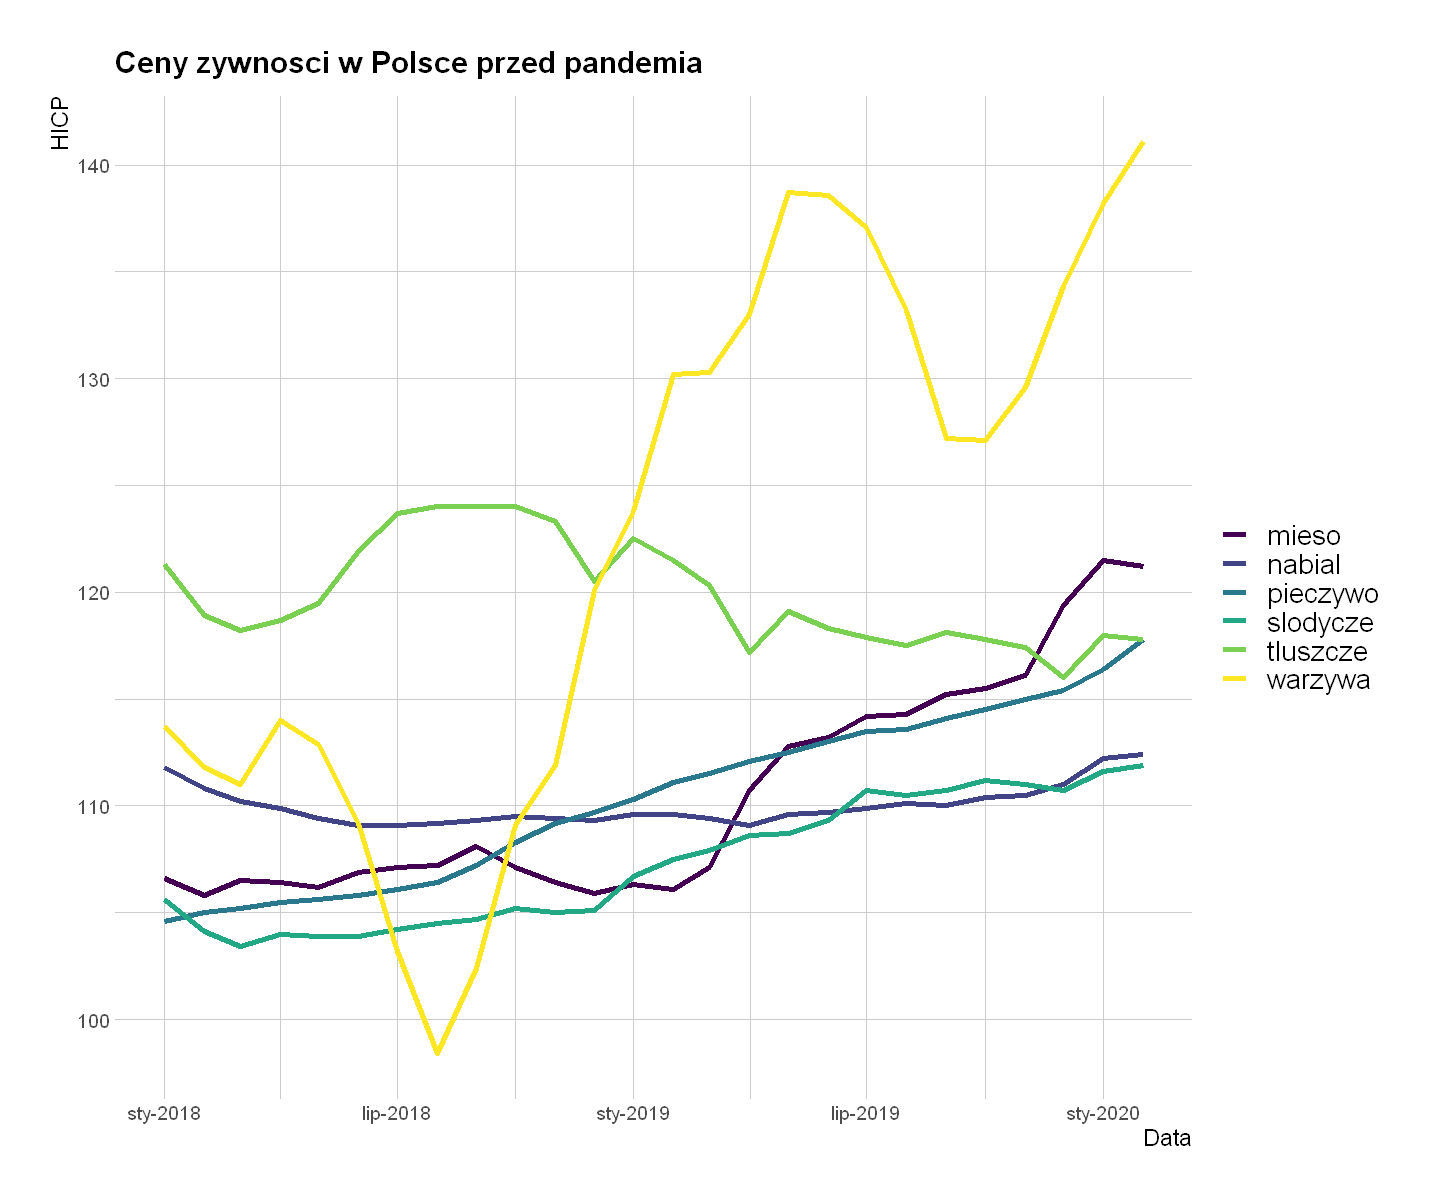

In [41]:
data_for_country = filter(before_pandemic_data, kraj %in% country)
plot_for_country(data_for_country, "Ceny zywnosci w Polsce przed pandemia", country, c('mieso', 'nabial', 'pieczywo', 'slodycze', 'tluszcze', 'warzywa'))

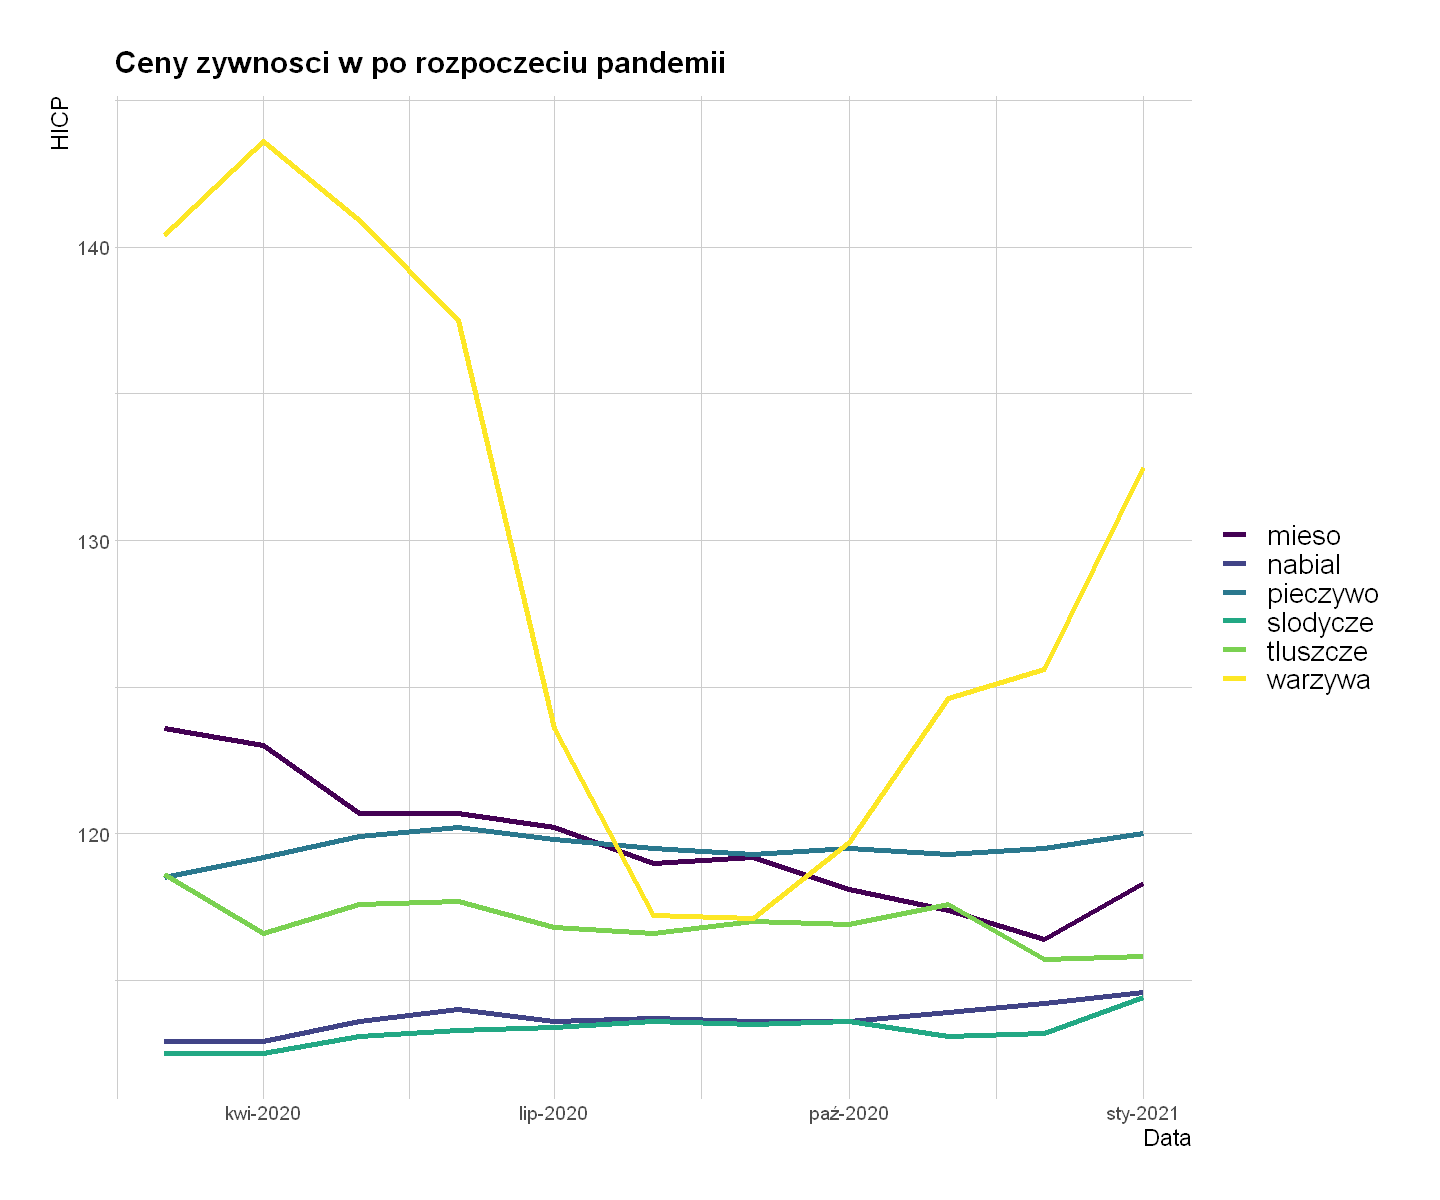

In [42]:
data_for_country = filter(pandemic_data, kraj %in% country)
plot_for_country(data_for_country, "Ceny zywnosci w po rozpoczeciu pandemii", country, c('mieso', 'nabial', 'pieczywo', 'slodycze', 'tluszcze', 'warzywa'))

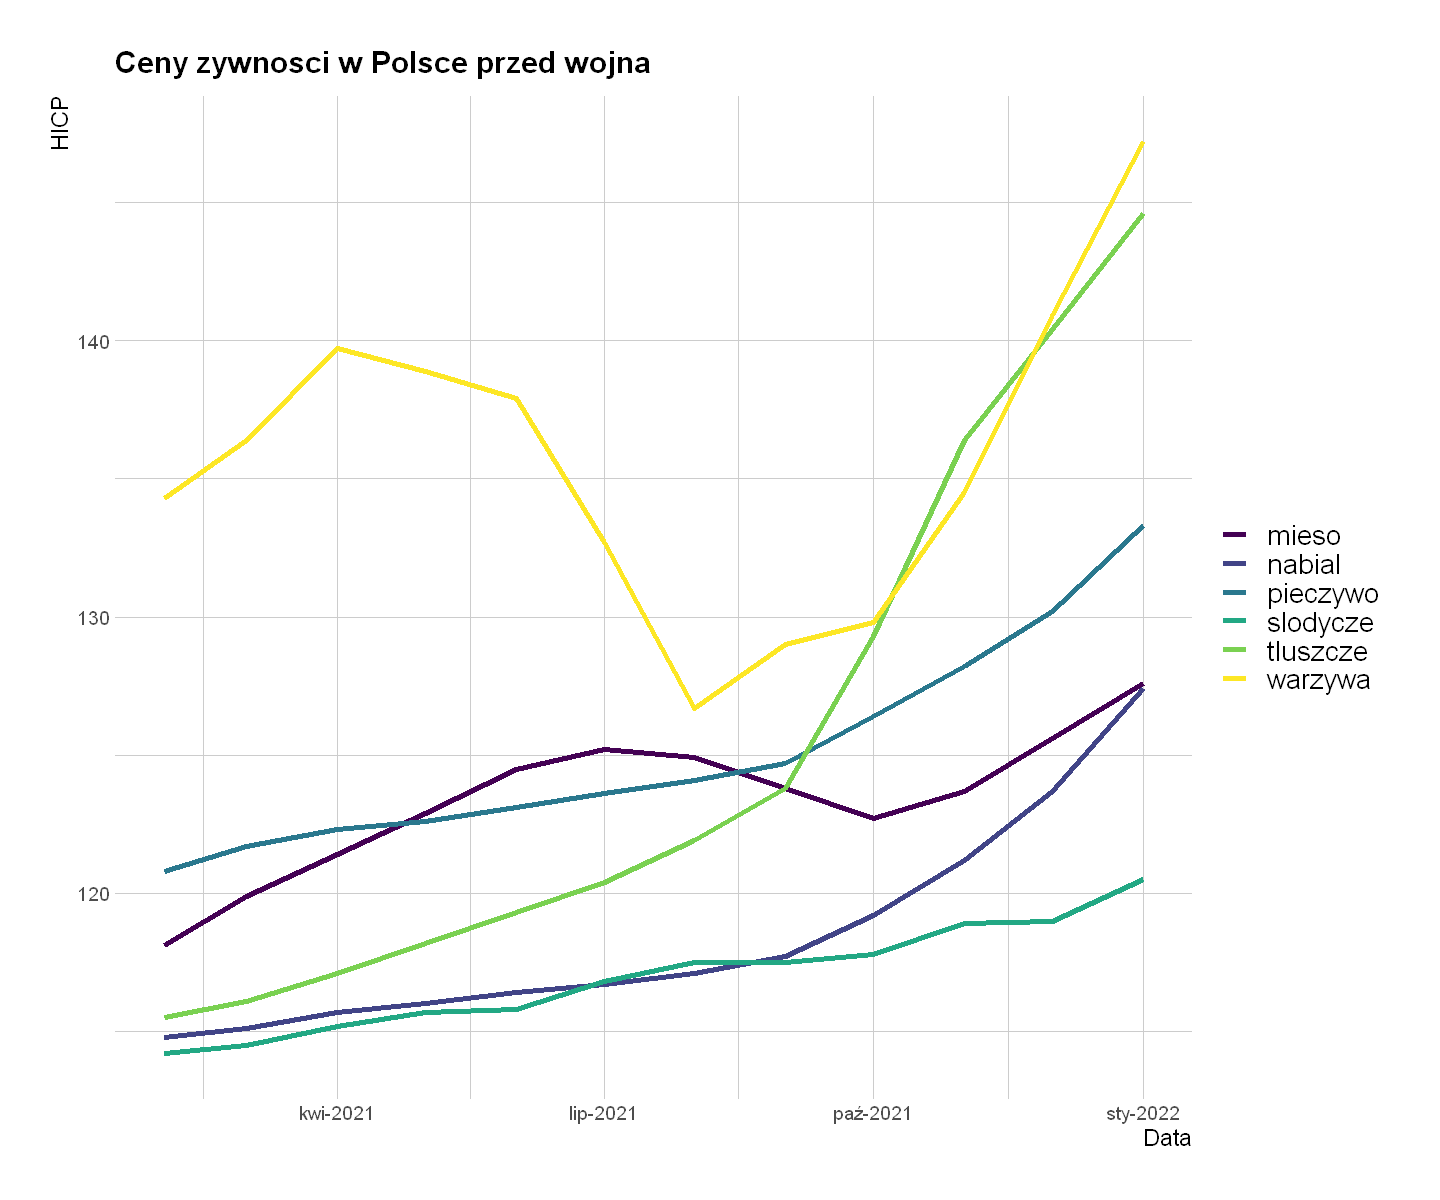

In [43]:
data_for_country = filter(before_war_data, kraj %in% country)
plot_for_country(data_for_country, "Ceny zywnosci w Polsce przed wojna", country, c('mieso', 'nabial', 'pieczywo', 'slodycze', 'tluszcze', 'warzywa'))

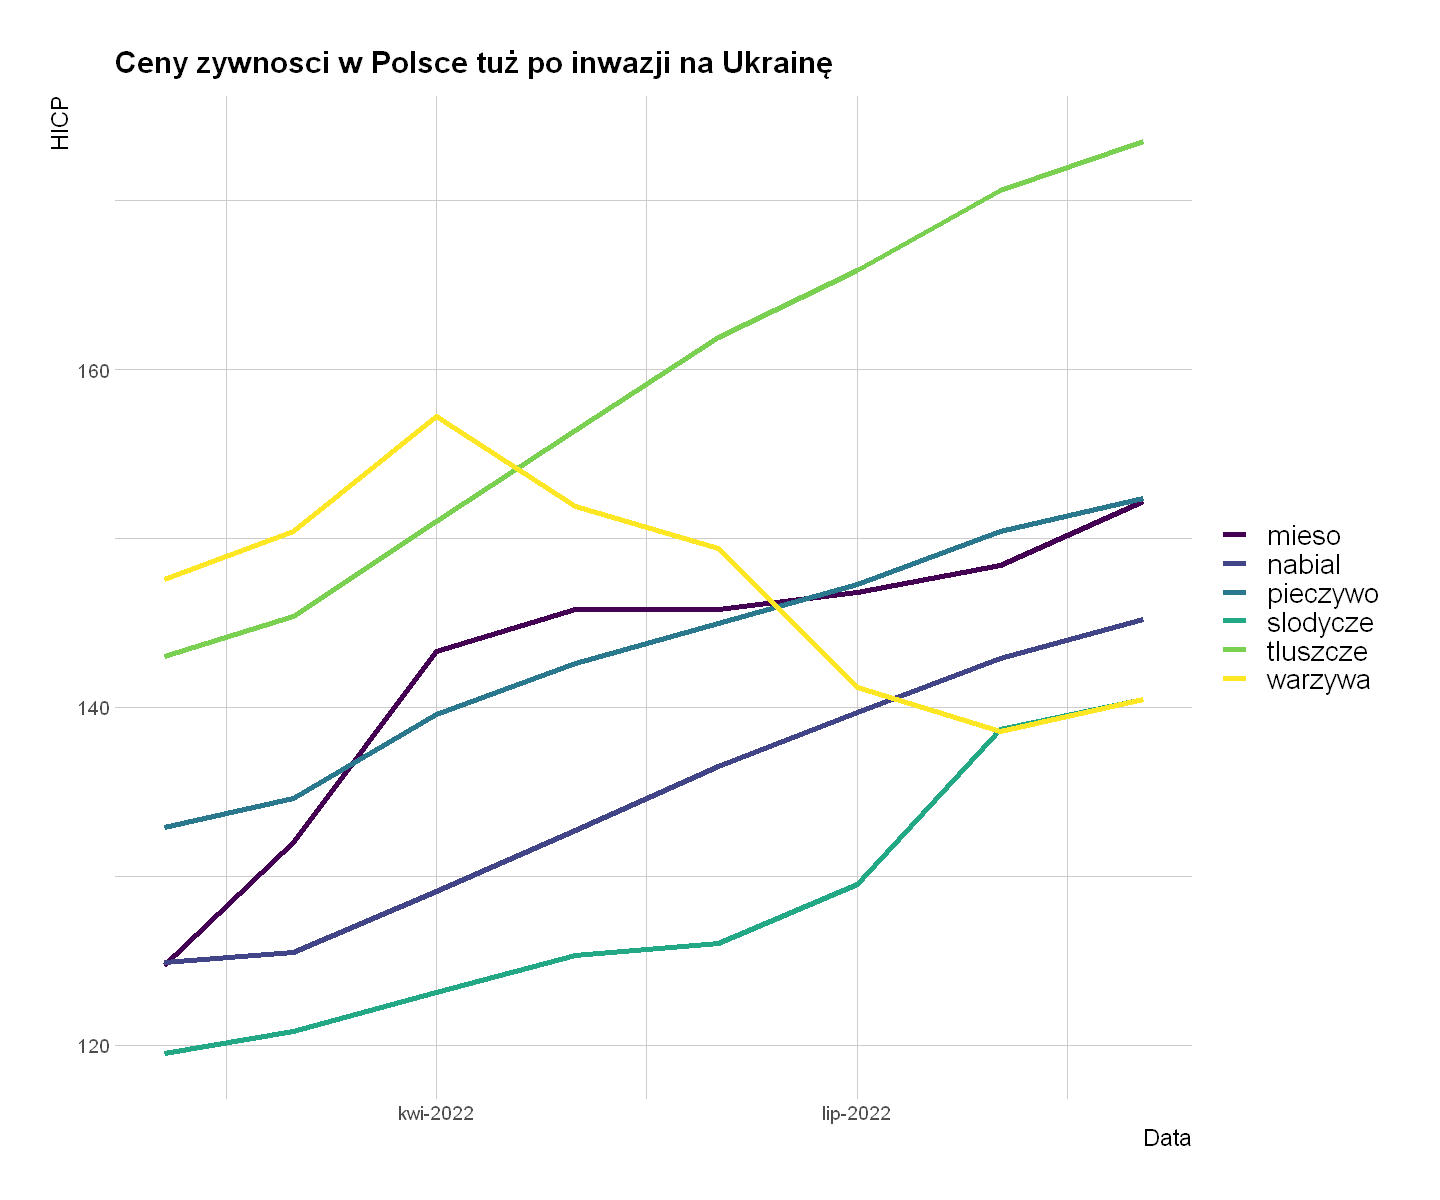

In [44]:
data_for_country = filter(war_data, kraj %in% country)
plot_for_country(data_for_country, "Ceny zywnosci w Polsce tuż po inwazji na Ukrainę", country, c('mieso', 'nabial', 'pieczywo', 'slodycze', 'tluszcze', 'warzywa'))